Shape: (2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium



Top Product Lines by Revenue:
PRODUCTLINE
Classic Cars        2968546.40
Vintage Cars        1644212.05
Motorcycles          971086.29
Trucks and Buses     947355.18
Planes               877942.21
Name: Revenue, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_12020\3246981845.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('PRODUCTLINE')['Revenue'].sum().sort_values().index,


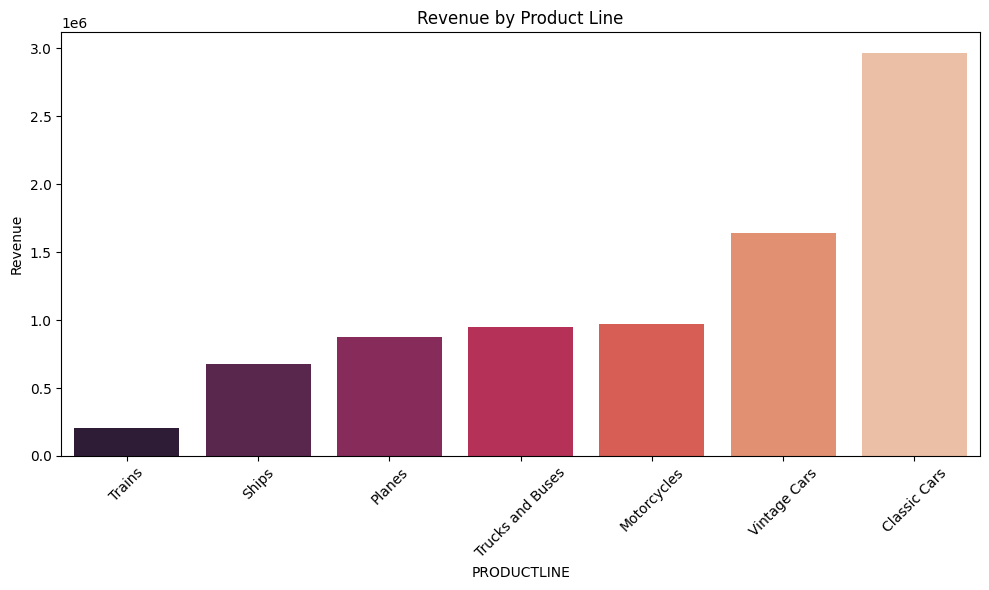

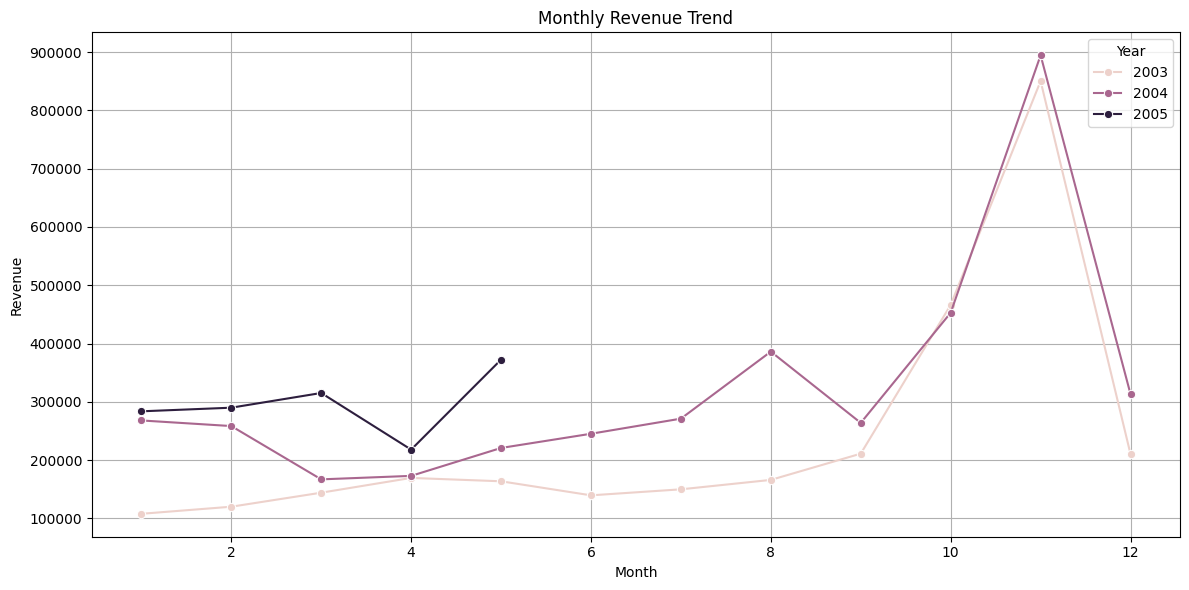

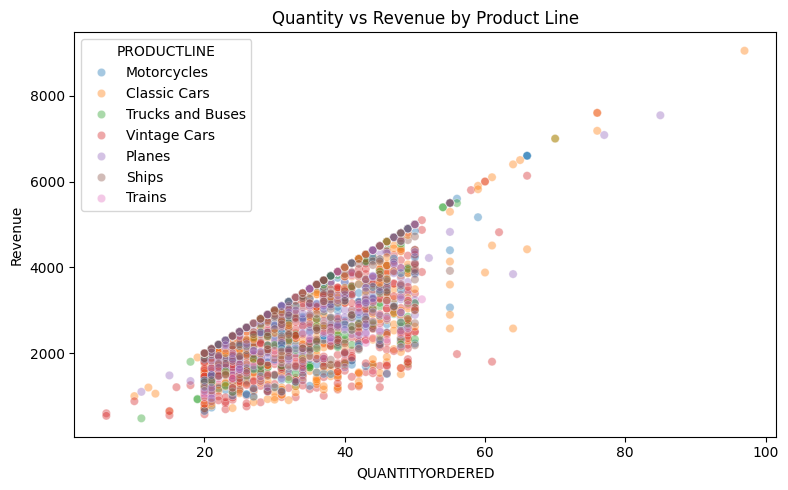

Top 10 Orders by Revenue:
       ORDERNUMBER  Revenue       PRODUCTLINE  COUNTRY
418         10405  9048.16      Classic Cars   France
598         10407  7600.00      Vintage Cars      USA
1995        10405  7600.00      Classic Cars   France
2586        10401  7543.75            Planes      USA
1714        10407  7182.00      Classic Cars      USA
2689        10401  7084.00            Planes      USA
1666        10412  7000.00  Trucks and Buses    Spain
1996        10419  7000.00      Classic Cars  Austria
25          10417  6600.00       Motorcycles    Spain
104         10403  6600.00       Motorcycles       UK


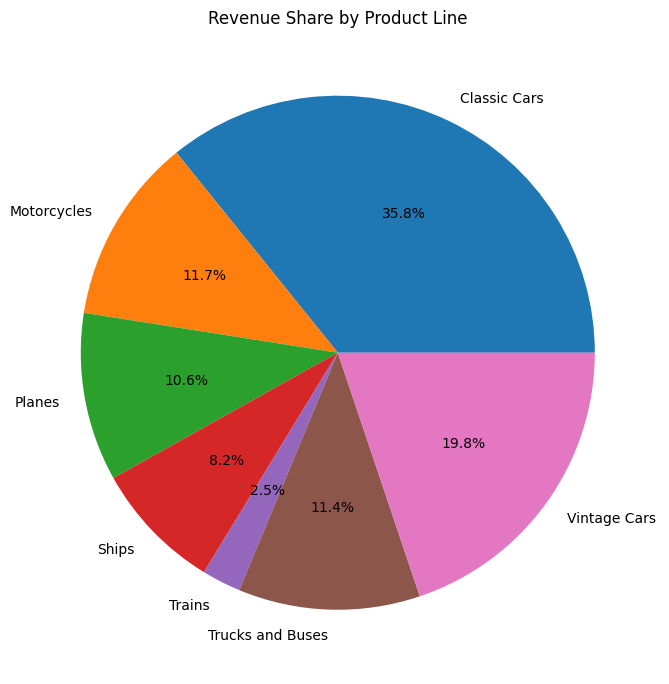

OSError: Cannot save file into a non-existent directory: 'data'

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("sales-data-sample.csv", encoding='latin1', parse_dates=['ORDERDATE'])
print("Shape:", df.shape)
display(df.head())
df.dropna(subset=['SALES','QUANTITYORDERED','PRICEEACH'], inplace=True)
df['Revenue'] = df['QUANTITYORDERED'] * df['PRICEEACH']
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['MonthName'] = df['ORDERDATE'].dt.strftime('%b')
print("\nTop Product Lines by Revenue:")
print(df.groupby('PRODUCTLINE')['Revenue'].sum().sort_values(ascending=False).head())
plt.figure(figsize=(10,6))
sns.barplot(x=df.groupby('PRODUCTLINE')['Revenue'].sum().sort_values().index,
            y=df.groupby('PRODUCTLINE')['Revenue'].sum().sort_values().values,
            palette='rocket')
plt.title("Revenue by Product Line")
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

monthly_sales = df.groupby(['Year','Month'])['Revenue'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', hue='Year', marker='o')
plt.title("Monthly Revenue Trend")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='QUANTITYORDERED', y='Revenue', alpha=0.4, hue='PRODUCTLINE')
plt.title('Quantity vs Revenue by Product Line')
plt.tight_layout()
plt.show()

top_orders = df.nlargest(10, 'Revenue')[['ORDERNUMBER','Revenue','PRODUCTLINE','COUNTRY']]
print("Top 10 Orders by Revenue:\n", top_orders)

product_share = df.groupby('PRODUCTLINE')['Revenue'].sum()
plt.figure(figsize=(7,7))
product_share.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title("Revenue Share by Product Line")
plt.tight_layout()
plt.show()

df.to_csv("data/sales_data_cleaned.csv", index=False)
